# Explore here

In [1]:
# Your code here
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
dup=data.duplicated().sum()
print(dup)

1


In [7]:
registros_dup=data[data.duplicated(keep=False)]
registros_dup

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

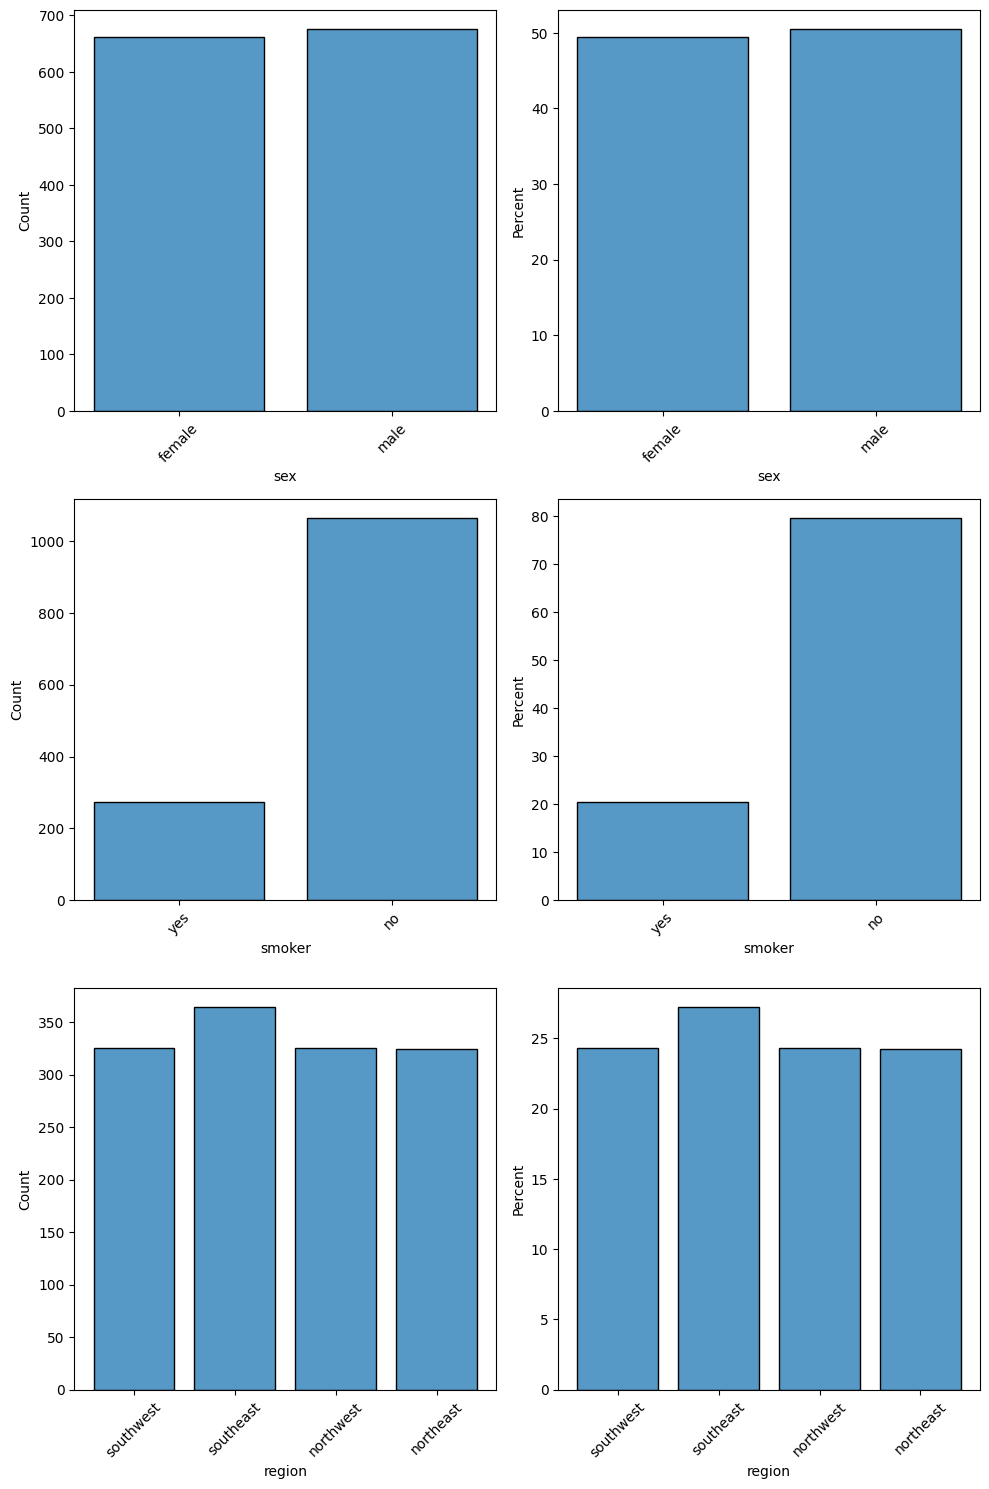

In [10]:
# Analisis de Variables categoricas 

fig, axis = plt.subplots(3, 2, figsize = (10, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "sex", shrink=.8)
sns.histplot(ax = axis[0, 1], data = data, x = "sex", stat="percent", shrink=.8)
sns.histplot(ax = axis[1, 0], data = data, x = "smoker", shrink=.8)
sns.histplot(ax = axis[1, 1], data = data, x = "smoker", stat="percent", shrink=.8)
sns.histplot(ax = axis[2, 0], data = data, x = "region", shrink=.8)
sns.histplot(ax = axis[2, 1], data = data, x = "region", stat="percent", shrink=.8)




# Rotar las etiquetas
for ax in axis.flat:
    ax.tick_params(axis='x', rotation=45)

# Ajustar el layout
plt.tight_layout()



# Mostrar el plot
plt.show()

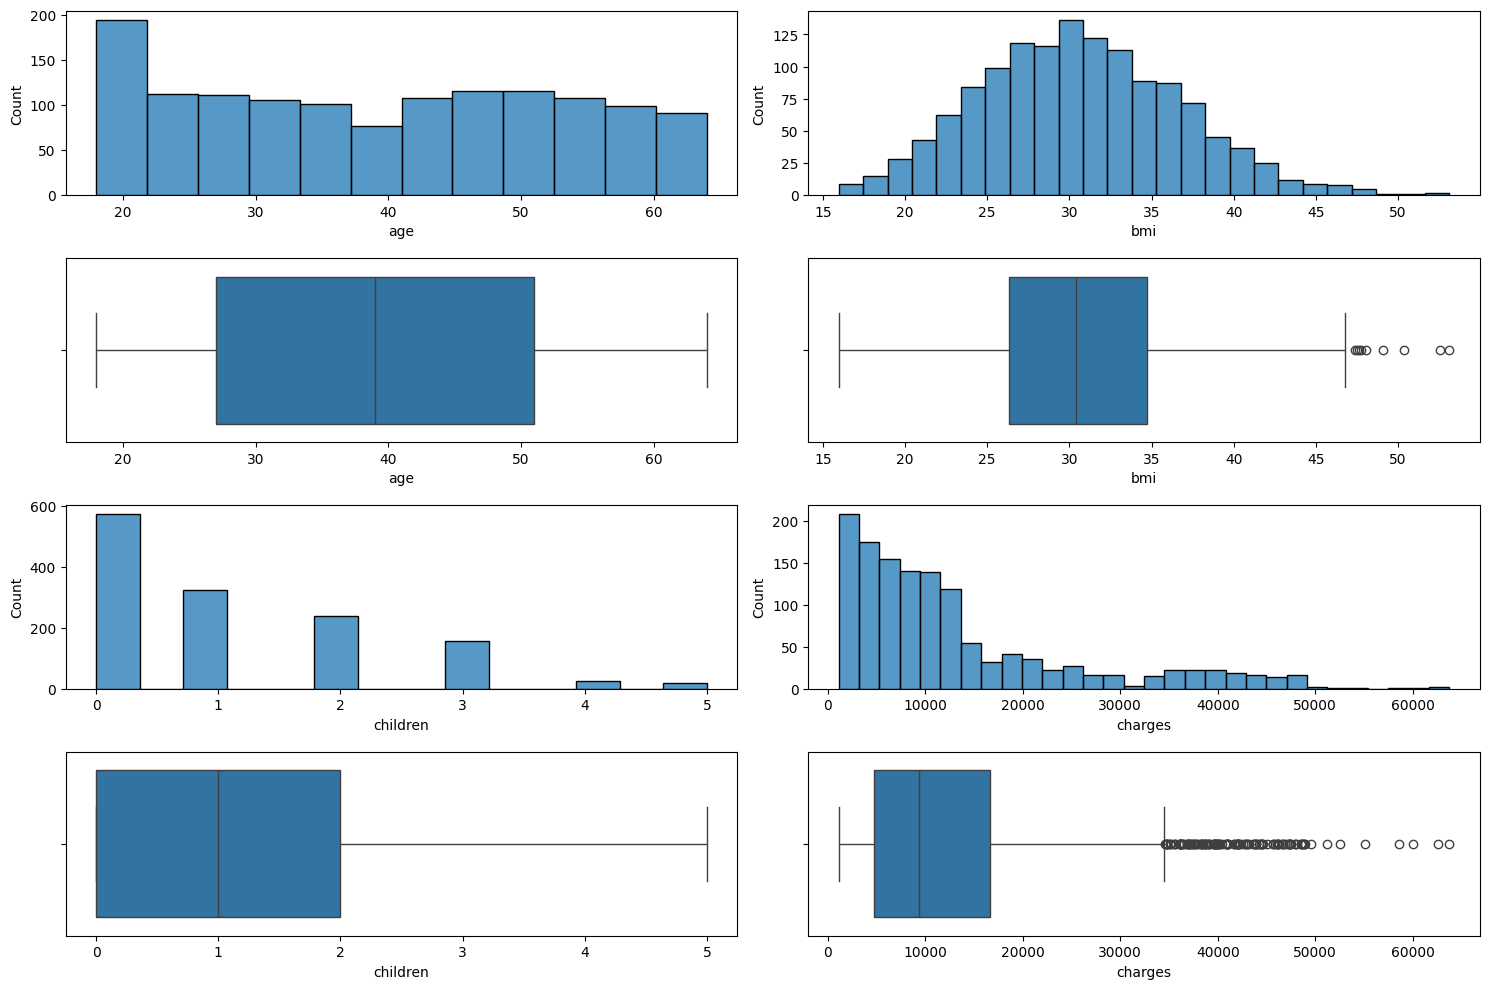

In [11]:
# Analisis de variables numericas

fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax = axis[1, 0], data = data, x = "age")
sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = data, x = "bmi")
sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax = axis[3, 0], data = data, x = "children")
sns.histplot(ax = axis[2, 1], data = data, x = "charges")
sns.boxplot(ax = axis[3, 1], data = data, x = "charges")


# Ajustar el layout
plt.tight_layout()
# fig.delaxes(axis[2, 1])
# fig.delaxes(axis[3, 1])

# Mostrar el plot
plt.show()

In [12]:
# Factorizar
data["sex_f"] = pd.factorize(data["sex"])[0]
data["smoker_f"] = pd.factorize(data["smoker"])[0]
data["region_f"] = pd.factorize(data["region"])[0]


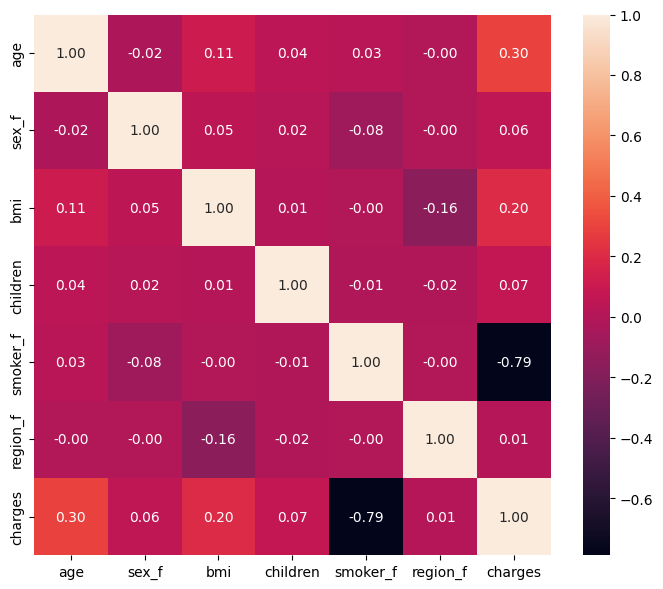

In [13]:
fig, axis = plt.subplots(figsize = (7, 6))
matriz_corr=data[['age','sex_f','bmi','children','smoker_f','region_f','charges']].corr()

#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

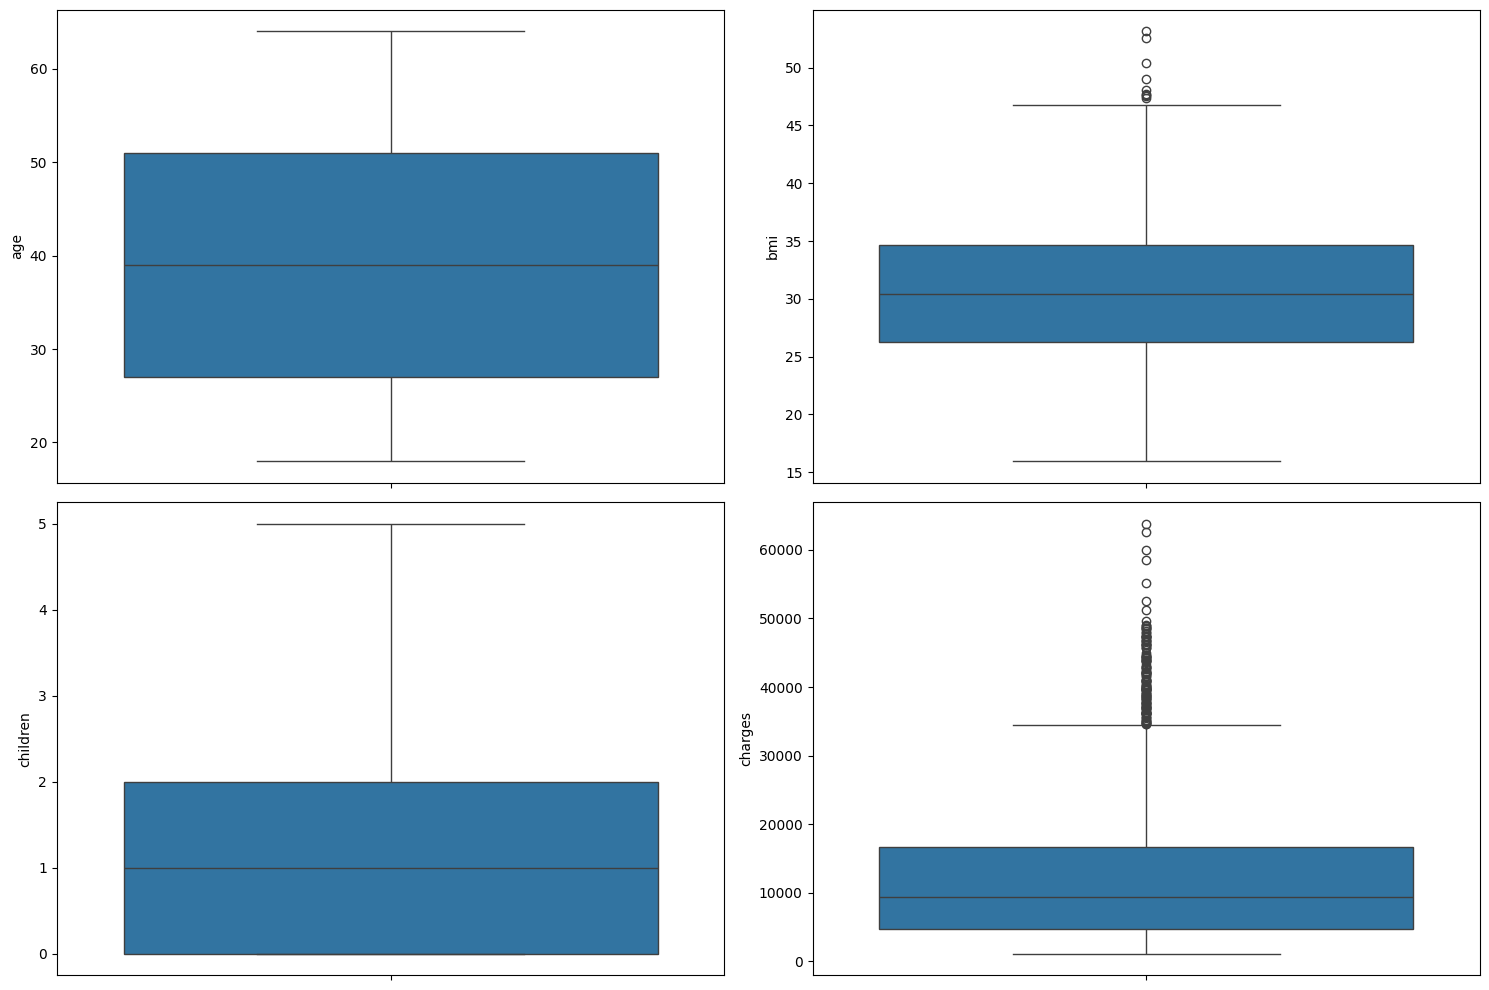

In [15]:
# Revision de Datos Atipicos
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "age")
sns.boxplot(ax = axis[0, 1], data = data, y = "bmi")
sns.boxplot(ax = axis[1, 0], data = data, y = "children")
sns.boxplot(ax = axis[1, 1], data = data, y = "charges")


plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [17]:
num_variables = ['age','sex_f','bmi','children','smoker_f','region_f',"charges"]

In [18]:
# Escalamos el modelo

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(data[num_variables])
data_scal =pd.DataFrame(scal_features, index = data.index, columns = num_variables)
data_scal.head()

,age,sex_f,bmi,children,smoker_f,region_f,charges
0,0.021739,0.0,0.321227,0.0,0.0,0.000000,0.251611
1,0.000000,1.0,0.479150,0.2,1.0,0.333333,0.009636
2,0.217391,1.0,0.458434,0.6,1.0,0.333333,0.053115
3,0.326087,1.0,0.181464,0.0,1.0,0.666667,0.333010
4,0.304348,1.0,0.347592,0.0,1.0,0.666667,0.043816
